In [0]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0,2,0.25)
s = np.sin(t*np.pi)
c = np.cos(t*np.pi + np.pi/2)

a = np.array([10*t,10*s, np.zeros((8))])
b = np.array([10*t,10*c, np.ones((8))])

abar = a - np.average(a)
bbar = b - np.average(b)

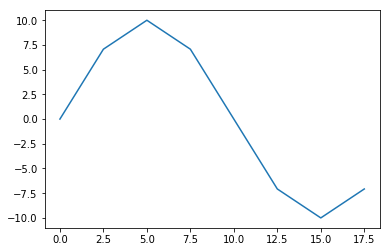

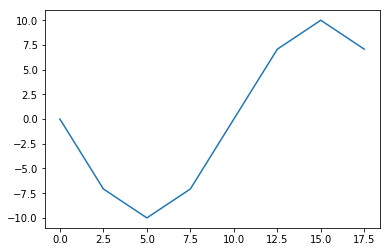

In [3]:
plt.plot(a[0,:],a[1,:])
plt.show()
plt.plot(b[0,:],b[1,:])
plt.show()

In [0]:
def procrustes(a,b):
    M = np.matmul(b,a.T)
    print(M)
    u,s,v = np.linalg.svd(M)
    z = np.eye(a.shape[0])
    z[-1,-1] = np.linalg.det(np.matmul(u,v))
    r = np.matmul(np.matmul(u,z),v)
    return r


def correspondence(a,b):
    cor = np.arange(b.shape[1])
    for i , p in enumerate(b):
        best = np.linalg.norm(p - b[cor[i]])
        for j, q in enumerate(a):
            dist = np.linalg.norm(p - q)
            if dist < best:
                cor[i] = j
                best = dist
    return cor


def icp(a,b,iter = 1, plot = False):
    a_ = a - np.average(a,axis=1)[:,np.newaxis]
    b_ = b - np.average(b,axis=1)[:,np.newaxis]
    r = np.eye(a.shape[0])
    for i in range(iter):
        cor = correspondence(a_,b_)
        R = procrustes(a_[:,cor],b_)
        r = np.dot(R,r)

        b_ = np.dot(R,b_)

        error = np.sum(np.linalg.norm(b_ - a_[:,cor], axis=0 )**2)

        if plot:
            print(i+1, cor, error)
            t = np.average(a - np.dot(r,b), axis= 1)
            btest = np.dot(r,b) + t[:,np.newaxis]
            plt.plot(btest[0,:],btest[1,:])
            plt.title(i)
            plt.show()
        
    t = np.average(a - np.dot(r,b), axis= 1)
    return r,t


def icp2(a,b,plot = False):
    a_ = a - np.average(a,axis=1)[:,np.newaxis]
    b_ = b - np.average(b,axis=1)[:,np.newaxis]
    r = np.eye(a.shape[0])
    error = 1e6
    threshold = 1e-6
    i = 0
    while (error >  threshold):
        cor = correspondence(a_,b_)
        R = procrustes(a_[:,cor],b_)
        r = np.dot(R,r)

        b_ = np.dot(R,b_)
        error = np.sum(np.linalg.norm(b_ - a_[:,cor], axis=0 ))

        if plot:
            print(i+1, cor, error)
            t = np.average(a - np.dot(r,b), axis= 1)
            btest = np.dot(r,b) + t[:,np.newaxis]
            plt.plot(btest[0,:],btest[1,:])
            plt.title(i)
            plt.show()
        i += 1
        
    t = np.average(a - np.dot(r,b), axis= 1)
    return r,t

[[ 262.5        -241.42135624    0.        ]
 [ 241.42135624 -400.            0.        ]
 [   0.            0.            0.        ]]
[[ 1.00000000e+00 -3.13053586e-16  0.00000000e+00]
 [-1.75514434e-16 -1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.00000000e+00]] [1.66533454e-16 1.21859376e-15 1.00000000e+00]
0.9999999999999998
final


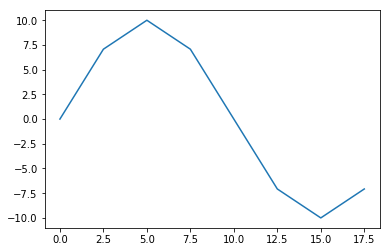

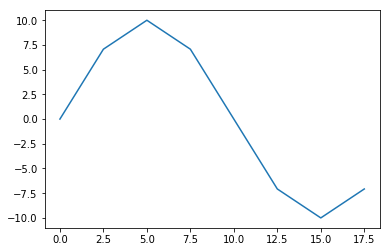

In [5]:
r, t = icp2(a,b)
print(r , t)
print(np.linalg.det(r))
print('final')
btest = np.dot(r,b) + t[:,np.newaxis]
plt.plot(btest[0,:],btest[1,:])
plt.show()

plt.plot(a[0,:],a[1,:])
plt.show()